In [13]:
import numpy as np
import os
import cv2

directory = 'CK+48'
dir_list = os.listdir(directory)
image_data_list = []
labels = []
emotions = []
l = 0

for data_dir in dir_list:
    # Check if the item is a directory
    if os.path.isdir(os.path.join(directory, data_dir)):
        data_list = os.listdir(os.path.join(directory, data_dir))
        for img in data_list:
            img_path = os.path.join(directory, data_dir, img)
            input_img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Load as grayscale
            
            # Check if the image was loaded correctly
            if input_img is None:
                print(f"Warning: Skipping invalid or unreadable image at {img_path}")
                continue  # Skip this image if it cannot be loaded
            
            input_img = cv2.resize(input_img, (48, 48))  # Resize to (48, 48)
            input_img = np.expand_dims(input_img, axis=-1)  # Add channel dimension to get (48, 48, 1)
            image_data_list.append(input_img)
            labels.append(l)
        print('Loaded images from ' + data_dir)
        emotions.append(data_dir)
        l += 1

# Convert list to numpy array and normalize
img_data = np.array(image_data_list, dtype='float32') / 255.0
print("Shape of img_data:", img_data.shape)


Loaded images from happy
Loaded images from contempt
Loaded images from fear
Loaded images from surprise
Loaded images from sadness
Loaded images from anger
Loaded images from disgust
Shape of img_data: (981, 48, 48, 1)


In [2]:
print(emotions)
def getLabel(id):
    return emotions[id]


['happy', 'contempt', 'fear', 'surprise', 'sadness', 'anger', 'disgust']


In [3]:
processed_images = []
for img in image_data_list:
    # Apply Gaussian blur
    blurred_img = cv2.GaussianBlur(img, (5, 5), 0)
    # Convert to grayscale
    gray_img = cv2.cvtColor(blurred_img, cv2.COLOR_BGR2GRAY)
    processed_images.append(gray_img)

# Convert to numpy array and normalize
processed_images = np.array(processed_images).reshape(-1, 48, 48, 1) / 255.0
processed_images.shape

(981, 48, 48, 1)

In [4]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
num_classes=7
Y = keras.utils.to_categorical(labels, num_classes)
X_train, X_test, y_train, y_test = train_test_split(processed_images, Y, test_size=0.2,shuffle=True)
X_train.shape

(784, 48, 48, 1)

[0. 0. 0. 1. 0. 0. 0.]


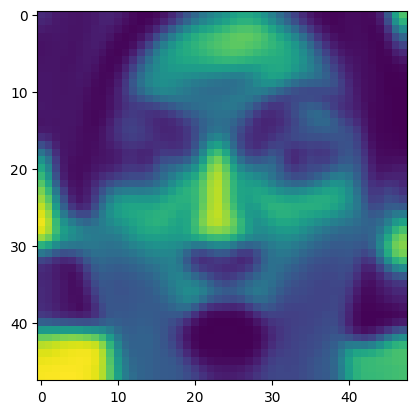

In [5]:
from matplotlib import pyplot as plt
print(y_train[499])
plt.imshow(X_train[499])
plt.show()

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.metrics import categorical_accuracy

from keras.metrics import categorical_accuracy

model=Sequential()
model.add(Conv2D(64,(3,3),input_shape=(48,48,1),activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(256,(3,3),activation='relu'))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.6))
model.add(Dense(num_classes,activation='softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

Epoch 1/250
25/25 [==============================] - 10s 383ms/step - loss: 1.9327 - accuracy: 0.2066 - val_loss: 1.9117 - val_accuracy: 0.1980
Epoch 2/250
25/25 [==============================] - 10s 394ms/step - loss: 1.8883 - accuracy: 0.2372 - val_loss: 1.8893 - val_accuracy: 0.1980
Epoch 3/250
25/25 [==============================] - 9s 375ms/step - loss: 1.8854 - accuracy: 0.2207 - val_loss: 1.8677 - val_accuracy: 0.1980
Epoch 4/250
25/25 [==============================] - 9s 367ms/step - loss: 1.8687 - accuracy: 0.2551 - val_loss: 1.8779 - val_accuracy: 0.1980
Epoch 5/250
25/25 [==============================] - 9s 370ms/step - loss: 1.8486 - accuracy: 0.2691 - val_loss: 1.7314 - val_accuracy: 0.1980
Epoch 6/250
25/25 [==============================] - 10s 384ms/step - loss: 1.5727 - accuracy: 0.3584 - val_loss: 1.4806 - val_accuracy: 0.5076
Epoch 7/250
25/25 [==============================] - 9s 378ms/step - loss: 1.3958 - accuracy: 0.4273 - val_loss: 1.7144 - val_accuracy: 0.4

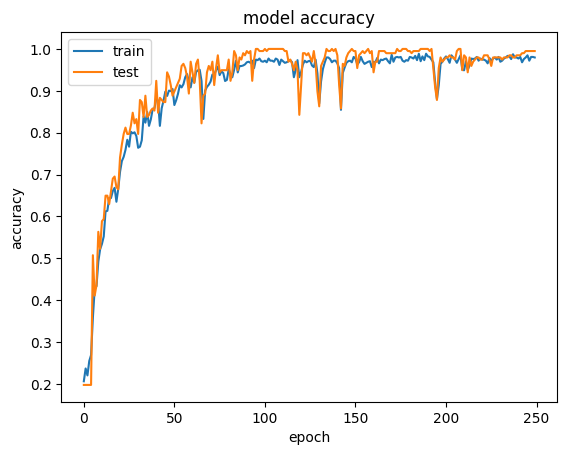

In [9]:
import matplotlib.pyplot as plt
history=model.fit(X_train, y_train,epochs=250,validation_data=(X_test, y_test))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [14]:
train_accuracy = history.history['accuracy'][-1]
val_accuracy = history.history['val_accuracy'][-1]
print(f"Final Training Accuracy: {train_accuracy:.4f}")
print(f"Final Validation Accuracy: {val_accuracy:.4f}")

Final Training Accuracy: 0.9796
Final Validation Accuracy: 0.9949


In [15]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

7/7 [==============================] - 0s 55ms/step - loss: 0.0349 - accuracy: 0.9949
Test Accuracy: 0.9949
